<a href="https://colab.research.google.com/github/Ishansingh438/Face-emotion-recognition/blob/main/Ishan_Singh_Face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.




# Problem Statements

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.

1.2.1 - Face Emotion Recognition
This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.ns.

# 1.3 Scope of Project


> A. Model should be able to identify students’ emotions using minimum reference images.

> B. Model should work on the real-time webcam video feed.

> C. Model must be deployed on AWS/GCP/Azure platform as an end-to-end solution.

> D. Model must be accessible via a web application (Streamlit) for demo purposes.

# Dataset Information
The data comes from the past Kaggle competition “Challenges in Representation Learning: Facial Expression Recognition Challenge”. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image.

This dataset contains 35887 grayscale 48x48 pixel face images.

Each image corresponds to a facial expression in one of seven categories

Labels:

> 0 - Angry 😠

> 1 - Disgust 😧

> 2 - Fear 😨

> 3 - Happy 😃

> 4 - Sad 😞

> 5 - Surprise 😮

> 6 - Neutral 😐

* Dataset link - https://www.kaggle.com/msambare/fer2013

# Face Emotion Recognition

This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.


In [19]:
# import libraries for deep face

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from zipfile import ZipFile

# installing deepface library

!pip install deepface


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout,Flatten, BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np 
import cv2
import os

# Removing Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [3]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image Prediction using DeepFace

In [4]:
pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from PIL import Image

In [6]:
# importing dataset
path = "/content/drive/MyDrive/Colab Notebooks/Capstone Project 5 ML+Deep learning/Face Emotion Recognition/test/happy/PrivateTest_10077120.jpg"

In [7]:
img = Image.open(path)

# Converting the image into the numpy array
img_array = np.array(img)

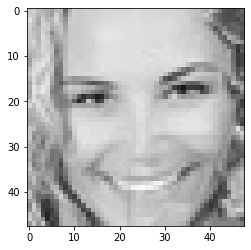

In [9]:
img_array = cv.imread(path)
plt.imshow(img_array)
plt.show()

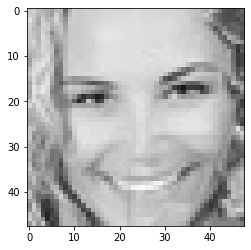

In [13]:
# convert image from BGR to RGB to work on RGB images

plt.imshow(cv.cvtColor(img_array, cv.COLOR_BGR2RGB))
plt.show()

In [16]:
# image prediction

img_prediction = DeepFace.analyze(img_array , enforce_detection =False)

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


In [17]:
img_prediction

{'emotion': {'angry': 4.137385079818378e-09,
  'disgust': 1.753175495098952e-17,
  'fear': 3.0795435549368677e-13,
  'happy': 99.44790608311818,
  'sad': 7.662963793725917e-09,
  'surprise': 0.0004443105733692614,
  'neutral': 0.5516459042106981},
 'dominant_emotion': 'happy',
 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 48},
 'age': 24,
 'gender': 'Woman',
 'race': {'asian': 0.1262912019925536,
  'indian': 0.4942525007130206,
  'black': 0.023027043706952407,
  'white': 69.22523791940438,
  'middle eastern': 13.077222590280925,
  'latino hispanic': 17.05397022092165},
 'dominant_race': 'white'}

#**Result**
* From deepface some predictions are good but some are not i.e. age is predicted inaccurate but dominant_race predicted is correct. We will be building another model for more better results accuracy. We use CNN model below.

# Transfer Learning - Prediction using ResNet50
> Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks. Reusing or transferring information from previously learned tasks to learning of new tasks has the potential to significantly improve the sample efficiency of a Data Scientist.

> ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.




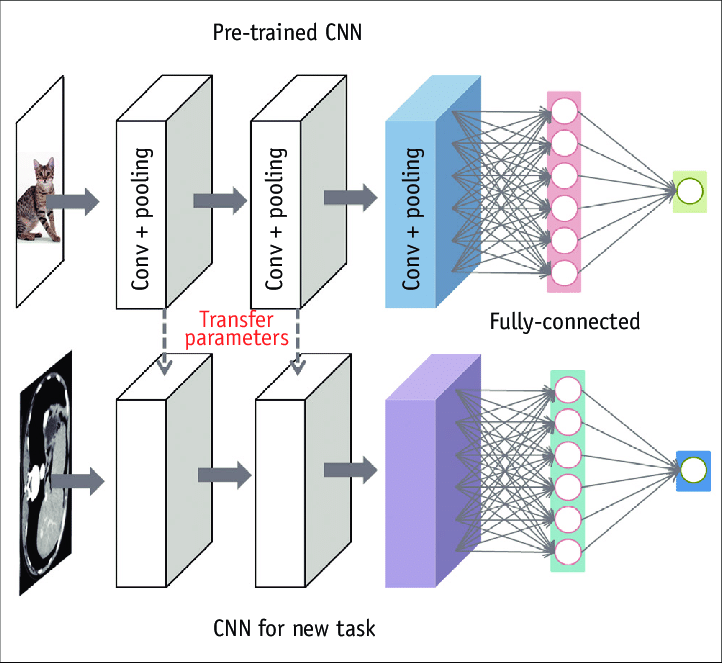

In [22]:
#test and train data

test_data = '/content/drive/MyDrive/Colab Notebooks/Capstone Project 5 ML+Deep learning/Face Emotion Recognition/test'
train_data = '/content/drive/MyDrive/Colab Notebooks/Capstone Project 5 ML+Deep learning/Face Emotion Recognition/train'

In [23]:
#list the directory of test path

os.listdir(test_data)

['surprise',
 'happy',
 'fear',
 'neutral',
 'disgust',
 'angry',
 'sad',
 'model_weights_resnet.h5']

In [25]:
#list the directory of test path
os.listdir(train_data)

['angry', 'disgust', 'fear', 'neutral', 'happy', 'sad', 'surprise']

In [26]:
#define a function to plot some images from different classes

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]

    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

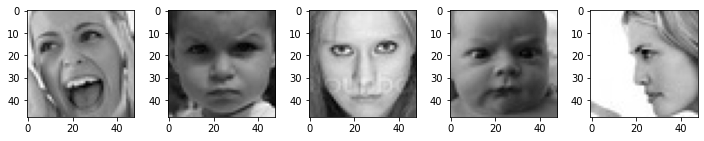

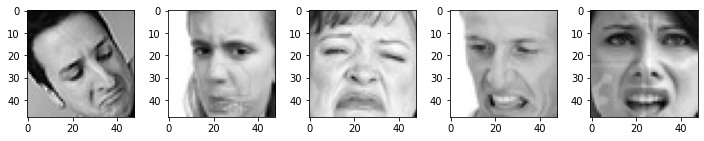

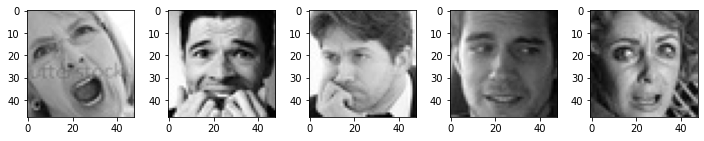

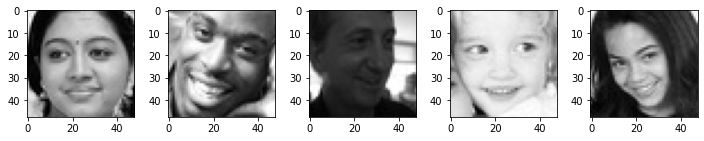

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [27]:
#angry class
plot_images(train_data+'/angry')
#disgust class
plot_images(train_data+'/disgust')
#fear class
plot_images(train_data+'/fear')
#happy class
plot_images(train_data+'/happy')
#neutral class
plot_images(train_data+'/neutral')
#sad class
plot_images(train_data+'/sad')
#surprise class
plot_images(train_data+'/surprise')

# ResNet Data Generators

In [29]:
# resnet is trained on rgb photos and we have grascaled images so converting colour mode to rgb is important

datagen_train = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)
datagen_validation = ImageDataGenerator(horizontal_flip=True,brightness_range=[0.8,1.2],rescale=1./255)

In [30]:
# size of image and batch
img_size = 48         
batch_size = 32       

train_generator = datagen_train.flow_from_directory(train_data,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

validation_generator = datagen_train.flow_from_directory(test_data,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 10033 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [32]:
#using pretrained model, RESNET50 architecture

from tensorflow.keras.applications.resnet50 import ResNet50

# creating a base model using resnet and loading the pretrained weights 

base_model = ResNet50(input_shape=(48,48,3),include_top = False, weights = 'imagenet')
base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                          

In [33]:
# making all the layers except last 4 layers non trainable 

for layer in base_model.layers[:-4]:
    layer.trainable = False

In [34]:
# Build model on the top of base model

epochs=50
batch_size = 32

model = Sequential()

model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())

#Fully connected 1st layer
model.add(Dense(512,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(7, activation='softmax'))


# Final model summary
model.summary()


# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


steps_per_epoch = train_generator.n//train_generator.batch_size

validation_steps = validation_generator.n//validation_generator.batch_size


# this decreases the learning rate if the model loss does not decrease 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.00001, mode='auto')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [ ]:
# to save model weights to my drive loaction

weight_checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project 5 ML+Deep learning/model_checkpoint'

checkpoint = ModelCheckpoint(weight_checkpoint_path, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            restore_best_weights=True)
callbacks = [checkpoint, reduce_lr,early_stopping]


# Fitting the model 
history = model.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks=callbacks,
    verbose=1)

Epoch 1/50
135/314 [===========>..................] - ETA: 22:28 - loss: 1.6173 - accuracy: 0.3773

In [ ]:
# save history of the model in dataframe df_modelhis
df_modelhis=pd.DataFrame(model.history.history)

#Plotting Loss
df_modelhis[['loss','val_loss']].plot()
